In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# Features engieneering

In [2]:
users = pd.read_csv('../data/train_users_2.csv')
# test_users = pd.read_csv('../data/test_users.csv')
sessions = pd.read_csv('../data/sessions.csv')
# ages = pd.read_csv('../data/age_gender_bkts.csv')
# countries = pd.read_csv('../data/countries.csv')
user_ids = set(sessions.user_id.values).intersection(users.id.values)

In [3]:
from datetime import datetime

def days_between(d1, d2, t1="%Y-%m-%d", t2="%Y-%m-%d"):
    d1 = datetime.strptime(d1, t1)
    d2 = datetime.strptime(d2, t2)
    return abs((d2 - d1).days)

In [4]:
users['month_account_created'] = users.apply(lambda r: int(r['date_account_created'].split('-')[1]), axis=1)

In [5]:
users['target'] = users.apply(lambda r: 1 if r['country_destination'] != 'NDF' else 0, axis=1)

In [6]:
data = pd.concat([users[users['target'] == 1].head(88000), users[users['target'] == 0].head(88000)])
data

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,month_account_created,target
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,9,1
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,12,1
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,9,1
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US,1,1
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154116,6mvrjolxfk,2014-02-18,20140218055331,NaN,-unknown-,NaN,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,NDF,2,0
154118,acdq94b5oo,2014-02-18,20140218055604,NaN,-unknown-,NaN,basic,0,en,sem-non-brand,google,omg,Web,iPad,Chrome Mobile,NDF,2,0
154119,pcqkta8etp,2014-02-18,20140218055939,NaN,-unknown-,NaN,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,NDF,2,0
154121,ykxgog2ws0,2014-02-18,20140218060032,NaN,MALE,29.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2,0


In [7]:
data['null_age'] = data['age'].isnull().astype(int)
data['age_correct'] = ((0 < data['age']) & (data['age'] < 100)).astype(int)
data['age_100'] = ((100 < data['age']) & (data['age'] < 2000)).astype(int)

In [8]:
data['gender_unknown'] = (data['gender'] == '-unknown-').astype(int)

In [9]:
data['aff_channel_api'] = (data['affiliate_channel'] == 'api').astype(int)
data['aff_channel_content'] = (data['affiliate_channel'] == 'content').astype(int)
data['aff_channel_other'] = (data['affiliate_channel'] == 'other').astype(int)

In [10]:
data['first_dev_type_mac'] = (data['first_device_type'] == 'Mac').astype(int)
data['first_dev_type_unknown'] = (data['first_device_type'] == 'Other/Unknown').astype(int)

In [11]:
data['created_account_spring'] = ((3 <= data['month_account_created']) & (data['month_account_created'] <= 6)).astype(int)
data['created_account_cold'] = ((7 <= data['month_account_created']) | (data['month_account_created'] <= 1)).astype(int)

In [47]:
data['signup_method_facebook'] = (data['signup_method'] == 'facebook').astype(int)

In [48]:
data

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,age_100,gender_unknown,aff_channel_api,aff_channel_content,aff_channel_other,first_dev_type_mac,first_dev_type_unknown,created_account_spring,created_account_cold,signup_method_facebook
21492,zfpdtly23g,2012-04-17,20120417000426,NaN,MALE,33.0,facebook,1,en,direct,...,0,0,0,0,0,0,0,1,0,1
92472,t9pkrxi71h,2013-07-19,20130719203650,NaN,FEMALE,50.0,facebook,0,en,direct,...,0,0,0,0,0,0,0,0,1,1
113720,yt9xcxr6g8,2013-10-02,20131002221435,NaN,MALE,NaN,facebook,12,es,api,...,0,0,1,0,0,0,0,0,1,1
36713,1xm5wrt1xv,2012-08-16,20120816062838,2012-09-12,MALE,NaN,basic,0,en,direct,...,0,0,0,0,0,0,0,0,1,0
69027,694xvvgq3h,2013-04-04,20130404105629,NaN,-unknown-,19.0,basic,0,en,other,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20201,bh9i6z98za,2012-04-01,20120401153157,NaN,MALE,40.0,basic,3,en,direct,...,0,0,0,0,0,0,0,1,0,0
38965,2fujatu5dz,2012-08-31,20120831180858,NaN,MALE,24.0,facebook,0,en,direct,...,0,0,0,0,0,0,0,0,1,1
22137,4jjrly58vc,2012-04-23,20120423222807,NaN,FEMALE,64.0,basic,0,en,direct,...,0,0,0,0,0,0,0,1,0,0
100409,y4xi1ielcx,2013-08-18,20130818200139,NaN,-unknown-,NaN,basic,0,en,direct,...,0,1,0,0,0,0,0,0,1,0


In [13]:
data = data.sample(frac=1)

In [49]:
n = int(data.shape[0] * 0.7)
matrix_data = data.loc[:, 'null_age':].values

X_train = matrix_data[:n, :]
y_train = data['target'].values[:n]

X_test = matrix_data[n:, :]
y_test = data['target'].values[n:]

In [50]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.684646124126437

In [51]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=99, max_depth=20)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6879604552944073

In [52]:
model.feature_importances_

array([0.25852531, 0.19278025, 0.00800601, 0.07578847, 0.00930597,
       0.02512125, 0.01639257, 0.        , 0.03247481, 0.12547767,
       0.07521584, 0.18091186])

## Where does my models get errors ?

In [53]:
pred = model.predict(X_test)

In [56]:
df = data.tail(data.shape[0] - n).copy().reset_index()

In [57]:
df['prediction'] = pred
df

,index,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,...,gender_unknown,aff_channel_api,aff_channel_content,aff_channel_other,first_dev_type_mac,first_dev_type_unknown,created_account_spring,created_account_cold,signup_method_facebook,prediction
0,68778,jwb9cuqlih,2013-04-03,20130403061447,NaN,MALE,46.0,facebook,0,en,...,0,0,0,0,0,0,1,0,1,1
1,178771,4yvayitv4p,2014-04-22,20140422054118,2014-04-24,FEMALE,29.0,facebook,0,en,...,0,0,0,0,0,0,1,0,1,1
2,124814,yp8xgvjoc0,2013-11-15,20131115193038,2013-11-27,MALE,29.0,basic,0,en,...,0,0,0,0,0,0,0,1,0,1
3,154101,jyshmeui9d,2014-02-18,20140218050511,2014-05-30,MALE,38.0,basic,0,en,...,0,0,0,0,0,0,0,0,0,1
4,146239,tcvms8x2oh,2014-01-26,20140126230444,NaN,-unknown-,NaN,basic,0,en,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52796,20201,bh9i6z98za,2012-04-01,20120401153157,NaN,MALE,40.0,basic,3,en,...,0,0,0,0,0,0,1,0,0,1
52797,38965,2fujatu5dz,2012-08-31,20120831180858,NaN,MALE,24.0,facebook,0,en,...,0,0,0,0,0,0,0,1,1,0
52798,22137,4jjrly58vc,2012-04-23,20120423222807,NaN,FEMALE,64.0,basic,0,en,...,0,0,0,0,0,0,1,0,0,1
52799,100409,y4xi1ielcx,2013-08-18,20130818200139,NaN,-unknown-,NaN,basic,0,en,...,1,0,0,0,0,0,0,1,0,0


In [58]:
errors = df[df['prediction'] != df['target']].copy().reset_index()
errors

,level_0,index,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,...,gender_unknown,aff_channel_api,aff_channel_content,aff_channel_other,first_dev_type_mac,first_dev_type_unknown,created_account_spring,created_account_cold,signup_method_facebook,prediction
0,0,68778,jwb9cuqlih,2013-04-03,20130403061447,NaN,MALE,46.0,facebook,0,...,0,0,0,0,0,0,1,0,1,1
1,9,55966,pole12lzmo,2013-01-15,20130115015958,2013-01-23,-unknown-,NaN,basic,0,...,1,0,0,0,0,0,0,1,0,0
2,11,7885,kkd23vm7je,2011-08-19,20110819043750,2011-08-19,-unknown-,NaN,basic,3,...,1,0,0,0,0,1,0,1,0,0
3,22,23242,gtb8qwktb0,2012-05-05,20120505004616,2012-09-29,-unknown-,NaN,basic,0,...,1,0,1,0,0,0,1,0,0,0
4,25,42107,1hvnmijey3,2012-09-23,20120923211536,2013-06-09,FEMALE,44.0,facebook,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16471,52782,66731,rhc0x5qs3d,2013-03-22,20130322233448,2013-03-29,-unknown-,NaN,basic,24,...,1,0,0,0,0,0,1,0,0,0
16472,52787,68538,l2yy4qrs4n,2013-04-02,20130402050224,NaN,MALE,63.0,facebook,0,...,0,0,0,0,0,0,1,0,1,1
16473,52792,106035,rccll5o6g3,2013-09-08,20130908224643,2014-02-06,MALE,29.0,facebook,0,...,0,0,0,0,0,0,0,1,1,0
16474,52796,20201,bh9i6z98za,2012-04-01,20120401153157,NaN,MALE,40.0,basic,3,...,0,0,0,0,0,0,1,0,0,1


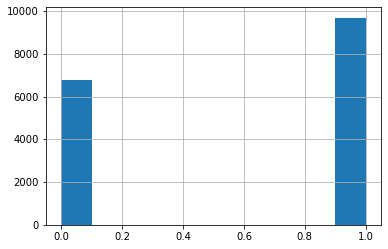

In [59]:
errors['target'].hist()

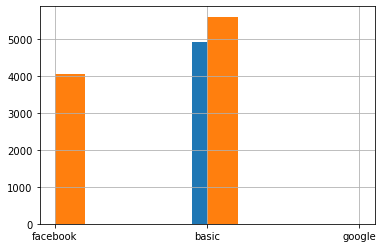

In [60]:
errors[errors['target'] == 0]['signup_method'].hist()
errors[errors['target'] == 1]['signup_method'].hist()